# Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from scipy.stats import norm, spearmanr

plt.rcParams['figure.figsize'] = 22, 10
plt.rcParams.update({'font.size': 20})

# Importing the financial data

In [2]:
win = pd.read_csv("..\\Downloads\\WIN.csv", names=["time", "open", "high", "low", "close_win", "tick_volume", "voltot"])
win["date"] = pd.to_datetime(win["time"]).apply(lambda x: date(x.year, x.month, x.day)).astype(str)
win["minute"] = pd.to_datetime(win["time"]).apply(lambda x: 900 + 100*(x.hour-9) + x.minute).astype(int)
win = win[["date", "time", "minute", "open", "low", "high", "close_win", "voltot"]]
win = win[(win.minute <= 1630) & (win.minute >= 1030)].drop(columns=["open", "low", "high", "voltot"])
win

,date,time,minute,close_win
0,2020-05-19,2020.05.19 10:54,1054,81600.0
1,2020-05-20,2020.05.20 15:17,1517,81600.0
3,2020-05-29,2020.05.29 11:10,1110,86800.0
4,2020-06-01,2020.06.01 11:47,1147,88950.0
5,2020-06-01,2020.06.01 12:48,1248,89000.0
...,...,...,...,...
25815,2020-10-09,2020.10.09 16:26,1626,97525.0
25816,2020-10-09,2020.10.09 16:27,1627,97585.0
25817,2020-10-09,2020.10.09 16:28,1628,97600.0
25818,2020-10-09,2020.10.09 16:29,1629,97560.0


In [3]:
ibov = pd.read_csv("..\\Downloads\\BOVA.csv", names=["time", "open", "high", "low", "close_ibov", "tick_volume", "voltot"])
ibov["date"] = pd.to_datetime(ibov["time"]).apply(lambda x: date(x.year, x.month, x.day)).astype(str)
ibov["minute"] = pd.to_datetime(ibov["time"]).apply(lambda x: 900 + 100*(x.hour-9) + x.minute).astype(int)
ibov = ibov[["date", "time", "minute", "open", "low", "high", "close_ibov", "voltot"]]
ibov = ibov[(ibov.minute <= 1630) & (ibov.minute >= 1030)].drop(columns=["open", "low", "high", "voltot"])
ibov["close_ibov"] = np.round((1038.55) * ibov["close_ibov"])
ibov

,date,time,minute,close_ibov
0,2019-10-01,2019.10.01 12:57,1257,104218.0
1,2019-10-01,2019.10.01 12:58,1258,104177.0
2,2019-10-01,2019.10.01 12:59,1259,104229.0
3,2019-10-01,2019.10.01 13:00,1300,104218.0
4,2019-10-01,2019.10.01 13:01,1301,104167.0
...,...,...,...,...
99970,2020-10-09,2020.10.09 16:26,1626,97509.0
99971,2020-10-09,2020.10.09 16:27,1627,97603.0
99972,2020-10-09,2020.10.09 16:28,1628,97582.0
99973,2020-10-09,2020.10.09 16:29,1629,97582.0


In [4]:
comb = win.merge(ibov, on=["date", "time", "minute"], how="inner")
comb = comb[(comb.date > "2020-08-12")].dropna()
comb

,date,time,minute,close_win,close_ibov
2721,2020-08-13,2020.08.13 10:30,1030,102955.0,102713.0
2722,2020-08-13,2020.08.13 10:31,1031,102840.0,102609.0
2723,2020-08-13,2020.08.13 10:32,1032,102875.0,102598.0
2724,2020-08-13,2020.08.13 10:33,1033,102935.0,102619.0
2725,2020-08-13,2020.08.13 10:34,1034,102905.0,102650.0
...,...,...,...,...,...
17517,2020-10-09,2020.10.09 16:26,1626,97525.0,97509.0
17518,2020-10-09,2020.10.09 16:27,1627,97585.0,97603.0
17519,2020-10-09,2020.10.09 16:28,1628,97600.0,97582.0
17520,2020-10-09,2020.10.09 16:29,1629,97560.0,97582.0


# Data visualization

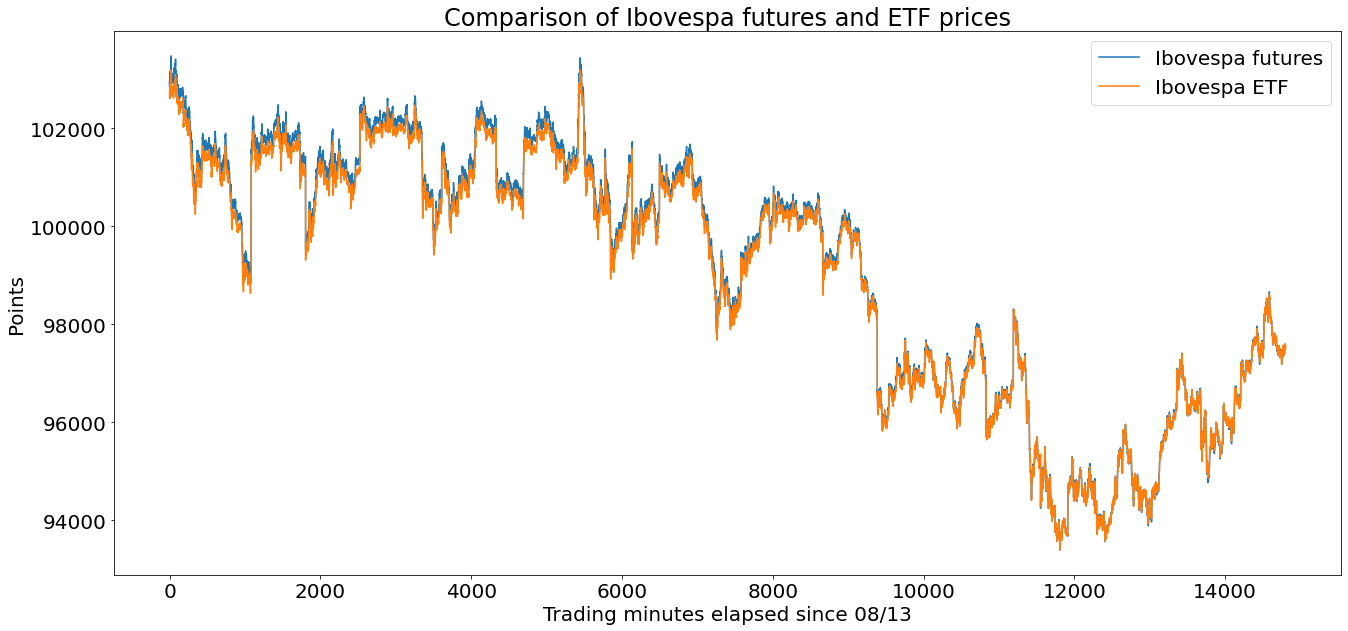

In [5]:
win_plot = win[win.date > "2020-08-12"].reset_index()
ibov_plot = ibov[ibov.date > "2020-08-12"].reset_index()
plt.plot(win_plot.close_win, label="Ibovespa futures")
plt.plot(ibov_plot.close_ibov, label="Ibovespa ETF")
plt.title("Comparison of Ibovespa futures and ETF prices")
plt.xlabel("Trading minutes elapsed since 08/13")
plt.ylabel("Points")
plt.legend()
plt.show()

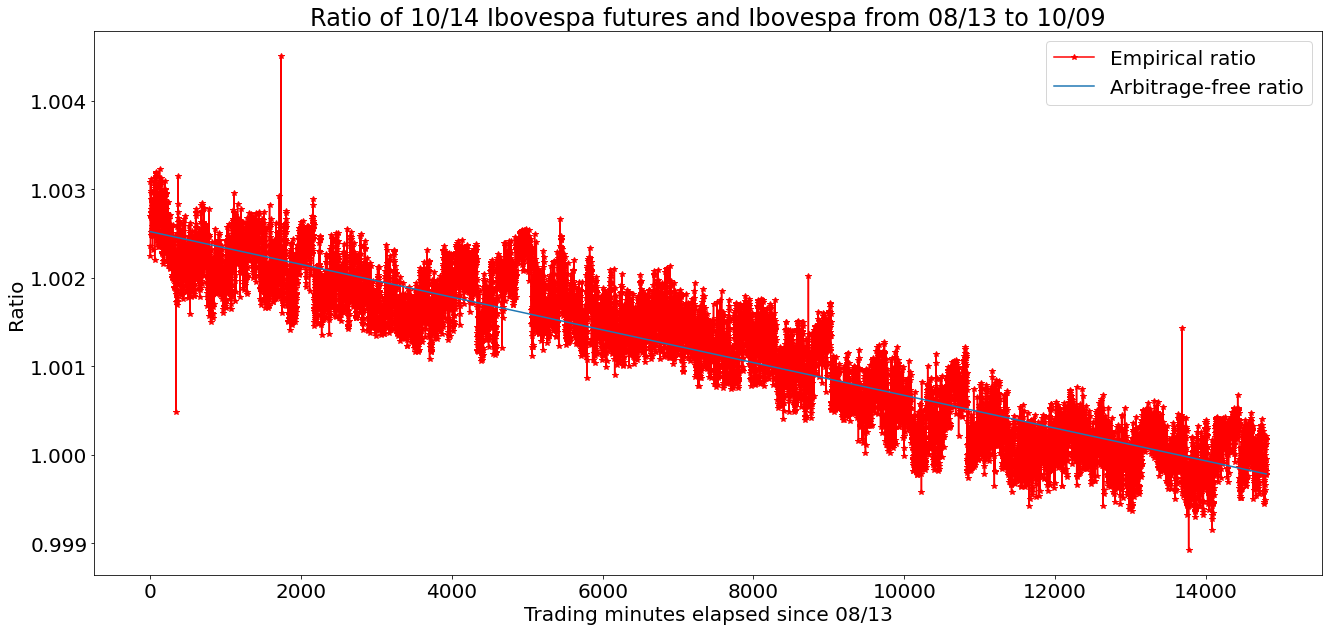

In [6]:
yy = comb.close_win/comb.close_ibov
xx = np.linspace(0, len(yy), len(yy))
plt.plot(xx, yy, "*r-", label="Empirical ratio")

# b, a = np.polyfit(x, y, 1)
plt.plot(xx, 1.002521 + (-1.8489e-07)*xx, label="Arbitrage-free ratio")
plt.title("Ratio of 10/14 Ibovespa futures and Ibovespa from 08/13 to 10/09")
plt.xlabel("Trading minutes elapsed since 08/13")
plt.ylabel("Ratio")
plt.legend()
plt.show()

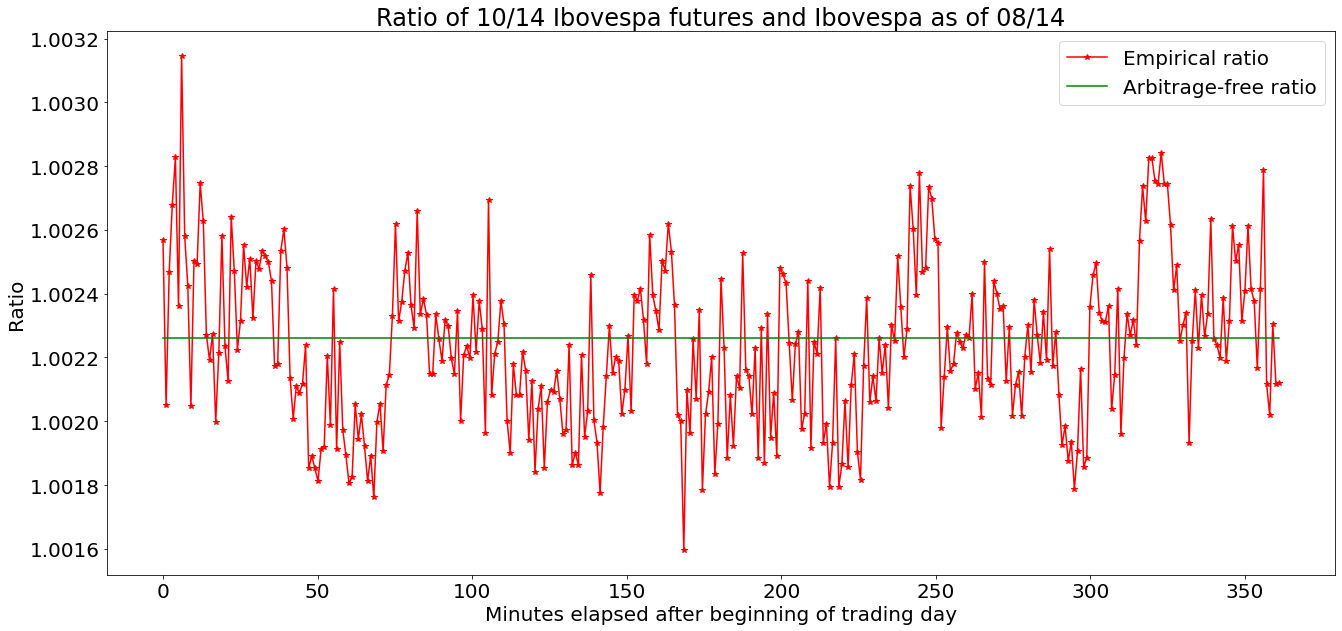

In [7]:
day = comb[comb.date == "2020-08-14"]
y = day.close_win/day.close_ibov
x = np.linspace(0, len(y), len(y))
plt.plot(x, y, "*r-", label="Empirical ratio")
plt.plot(x, 1.00226 - 0 * x, "g", label="Arbitrage-free ratio")
plt.title("Ratio of 10/14 Ibovespa futures and Ibovespa as of 08/14")
plt.xlabel("Minutes elapsed after beginning of trading day")
plt.ylabel("Ratio")
plt.legend()
plt.show()

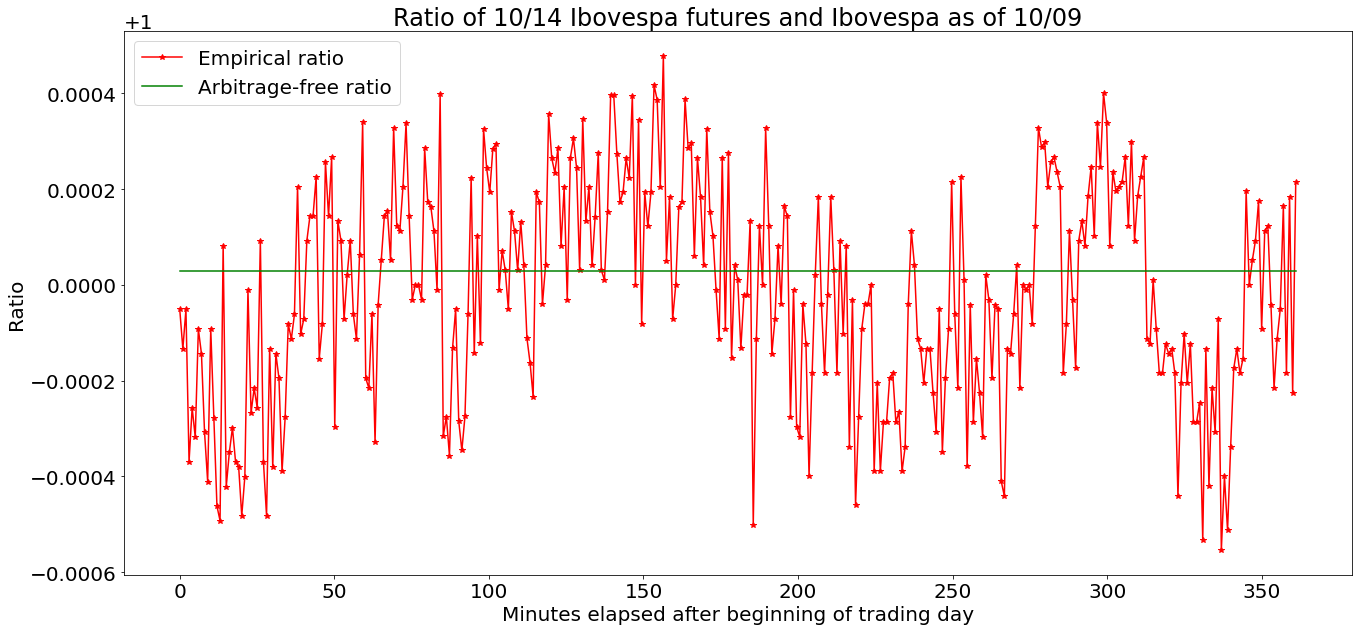

In [8]:
day = comb[comb.date == "2020-10-09"]
y2 = day.close_win/day.close_ibov
x2 = np.linspace(0, len(y2), len(y2))
plt.plot(x2, y2, "*r-", label="Empirical ratio")
plt.plot(x2, 1.00003 - 0 * x2, "g", label="Arbitrage-free ratio")
plt.title("Ratio of 10/14 Ibovespa futures and Ibovespa as of 10/09")
plt.xlabel("Minutes elapsed after beginning of trading day")
plt.ylabel("Ratio")
plt.legend()
plt.show()

# How can we be sure that OU is a good assumption?

## Analysis of OU for particular $\theta$'s

The original SDE is

$$
dX_t = \theta(\mu - X_t) + \sigma dW
$$

And in terms of finite data points,

$$
X_{t+1} - X_{t} = \theta(\mu - X_t) + \sigma \delta W
$$

We now derive the distribution from which $X_{t+1}$ would be derived,

$$
X_{t+1} - X_{t} \sim \theta(\mu - X_t) + \mathcal{N}(0, \sigma)
$$

$$
X_{t+1} - X_{t} \sim \mathcal{N}(\theta (\mu - X_t), \sigma)
$$

### Case 1: $\theta < 0$
If $\theta < 0$, the model clearly goes away from $\mu$ since the update is gaussian with mean further away from $\mu$: bad assumption!

### Case 2: $\theta = 0$

If $\theta = 0$,

$$
X_{t+1} - X_{t} \sim \mathcal{N}(0, \sigma)
$$

so it does behave like a Wiener process with no drift: bad assumption! In fact, returning to the SDE, this is even more obvious,

$$
dX_t = \sigma dW
$$

### Case 3: $0 < \theta < 1$

If $0 < \theta < 1$, the model clearly moves towards $\mu$ since the update is gaussian with mean closer to $\mu$ than $X_t$: good assumption!

### Case 4: $\theta = 1$

If $\theta = 1$,

$$
X_{t+1} - X_{t} \sim \mathcal{N}(\mu - X_t, \sigma)
$$

$$
X_{t+1} - X_{t} \sim -X_t + \mathcal{N}(\mu, \sigma)
$$

$$
X_{t+1} \sim \mathcal{N}(\mu, \sigma)
$$

so the process is really just a Gaussian process with mean $\mu$ and standard deviation $\sigma$: bad assumption!

### Case 5: $\theta > 1$

For $\theta > 1$,

$$
X_{t+1} - X_{t} \sim \mathcal{N}(\theta(\mu - X_t), \sigma)
$$

$$
X_{t+1} - X_{t} \sim \mathcal{N}((\mu - X_t) + (\theta-1)(\mu - X_t), \sigma)
$$

$$
X_{t+1} - X_{t} \sim (\mu - X_t) + \mathcal{N}((\theta-1)(\mu - X_t), \sigma)
$$

$$
X_{t+1} \sim \mu + \mathcal{N}((\theta-1)(\mu - X_t), \sigma)
$$

so it does exhibit mean reverting behavior but the mean of the update is always on the "other side" of the current value, so it tends to be constantly overshooting the mean. It this does not necessarily refutes our assumption of OU, it would raise questions about the choice of the model.

# Fitting the OU model

In [9]:
def get_params(y):
    y = np.array(y)
    updates = y[1:]-y[:-1]
    deviation =  y.mean() - y[:-1]
    theta = 0
    RMS_update = np.sqrt(sum(updates**2))
    RMS_deviation = np.sqrt(sum(deviation**2))
    print(f"RMS update: {RMS_update:.4}")
    print(f"RMS deviation: {RMS_deviation:.4}")
    
    error = 1e5
    while error > sum((updates - (theta + 1e-4)*deviation)**2):
        theta += 1e-4
        random_update = updates - theta*deviation
        error = sum(random_update**2)
    
    print("\nModel statistics:")
    print(f"RMS stochastic update: {np.sqrt(error):.4}")
    sigmadW = updates - theta*deviation
    print(f"sigma dW mean: {sigmadW.mean():.4}")
    print(f"sigma dW std: {sigmadW.std():.4}")
    print(f"theta, sigma = {theta:.4}, {sigmadW.std():.4}")
    return theta, sigmadW.std()

print("MODEL FITTED FOR 08/14")
theta, sigma = get_params(y)
print(50*"-")
print("MODEL FITTED FOR 10/09")
theta2, sigma2 = get_params(y2)

MODEL FITTED FOR 08/14
RMS update: 0.004456
RMS deviation: 0.004669

Model statistics:
RMS stochastic update: 0.00391
sigma dW mean: -1.104e-06
sigma dW std: 0.0002061
theta, sigma = 0.4576, 0.0002061
--------------------------------------------------
MODEL FITTED FOR 10/09
RMS update: 0.003972
RMS deviation: 0.004204

Model statistics:
RMS stochastic update: 0.003504
sigma dW mean: 4.508e-07
sigma dW std: 0.0001847
theta, sigma = 0.4448, 0.0001847


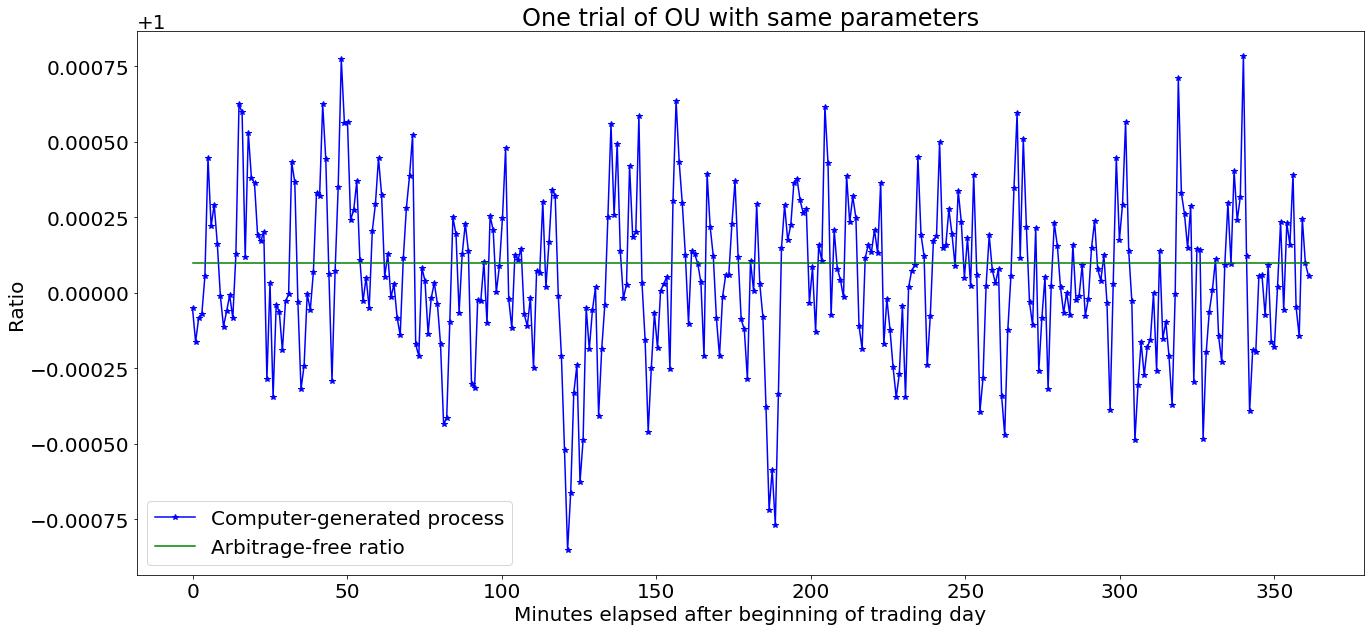

In [10]:
Y = [np.array(y2)[0]]
mu = 1.0001
for i in range(len(x2)-1):
    RV = np.random.normal()
    Y.append(Y[i] + theta*(mu - Y[i]) + sigma*RV)

plt.title("One trial of OU with same parameters")
plt.plot(x2, Y, "*b-", label="Computer-generated process")
plt.plot(x2, 1.0001 - 0 * x2, "g", label="Arbitrage-free ratio")
plt.xlabel("Minutes elapsed after beginning of trading day")
plt.ylabel("Ratio")
plt.legend()
plt.show()

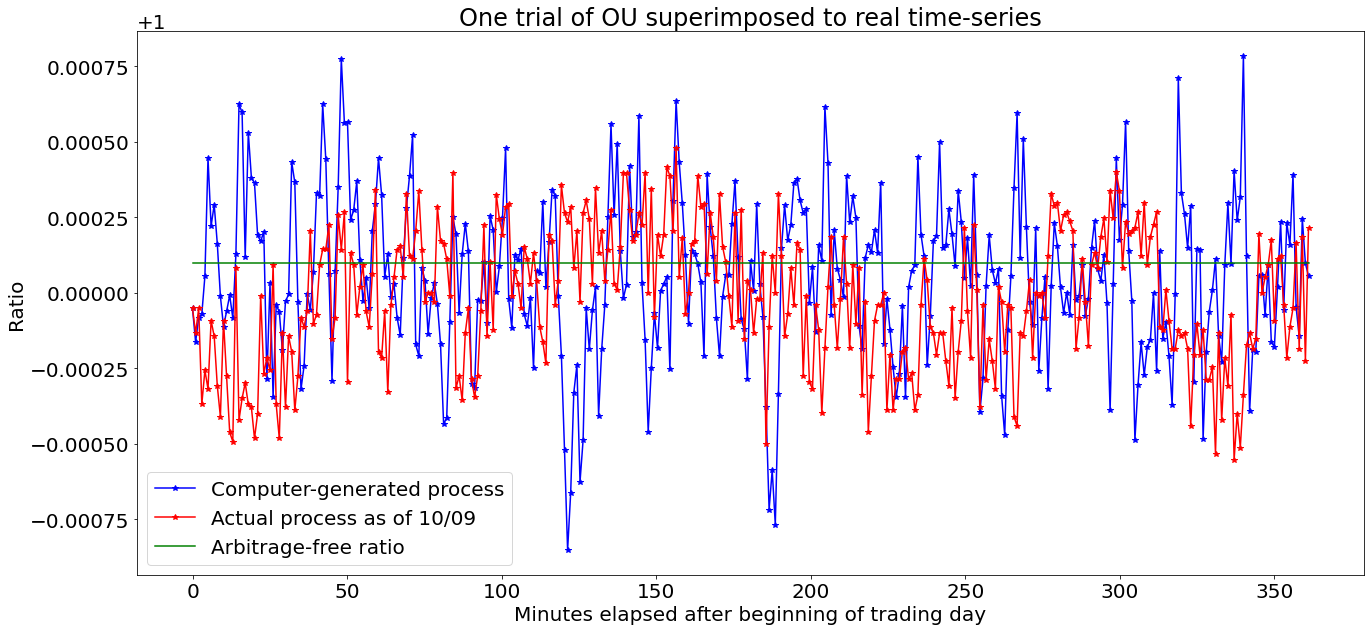

In [11]:
plt.title("One trial of OU superimposed to real time-series")
plt.plot(x2, Y, "*b-", label="Computer-generated process")
plt.plot(x2, y2, "*r-", label="Actual process as of 10/09")
plt.plot(x2, 1.0001 - 0 * x2, "g", label="Arbitrage-free ratio")
plt.xlabel("Minutes elapsed after beginning of trading day")
plt.ylabel("Ratio")
plt.legend()
plt.show()

# Fokker-Planck modelling

In [12]:
def OUFP(x, last, t, mu, theta, sigma):
    var = (sigma**2)/(2*theta) * (1 - np.exp(-2*theta*t))
    mean = mu + (last - mu)*np.exp(-theta*t)
    mult = 1/np.sqrt(2*np.pi*var)
    exp = np.exp(-1/(2*var) * (x - mean)**2)
    
    z = (last - mean)/np.sqrt(var)
    cdf = norm.cdf(z)
    print(f"Probability of inefficiency increasing further at t + {t}: {100 * min(1 - cdf, cdf):.4}%")
    
    return mult * exp

## Example 1: should I trade now or wait?

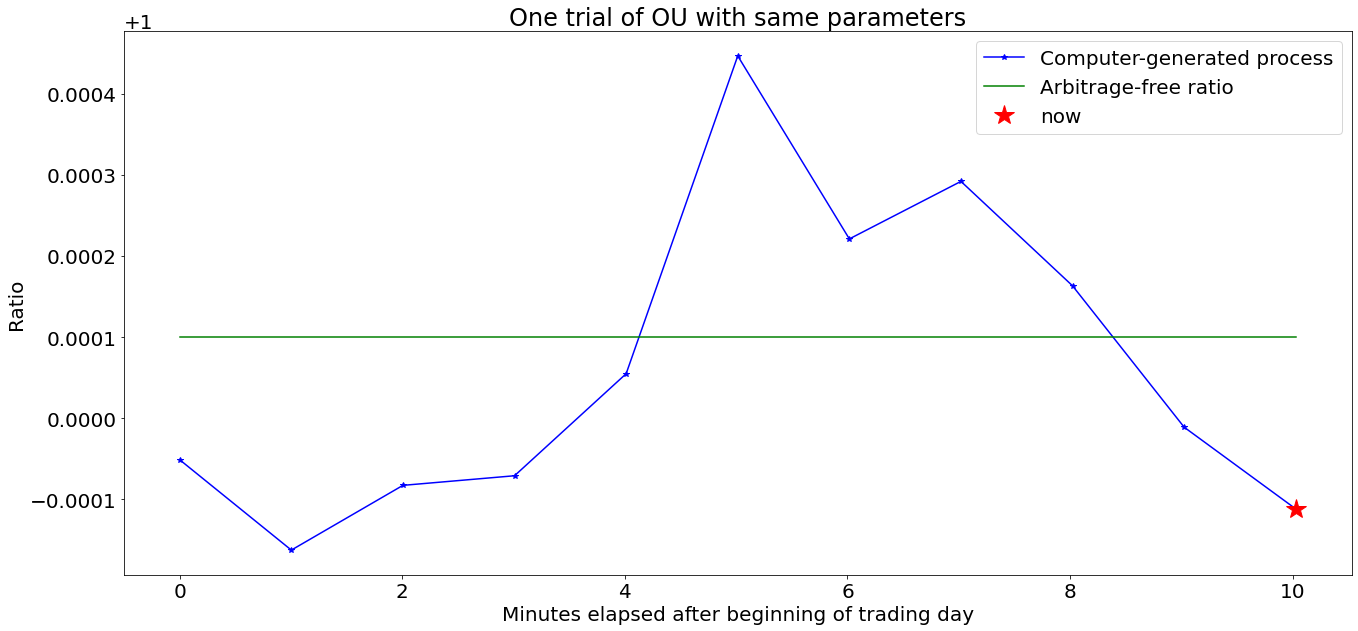

In [13]:
plt.title("One trial of OU with same parameters")
plt.plot(x2[:11], Y[:11], "*b-", label="Computer-generated process")
plt.plot(x2[:11], 1.0001 - 0 * x2[:11], "g", label="Arbitrage-free ratio")
plt.plot(x2[10:11], Y[10:11], "*r", markersize=20, label="now")
plt.xlabel("Minutes elapsed after beginning of trading day")
plt.ylabel("Ratio")
plt.legend()
plt.show()

Probability of inefficiency increasing further at t + 1: 30.65%
Probability of inefficiency increasing further at t + 2: 24.23%
Probability of inefficiency increasing further at t + 5: 16.6%
Probability of inefficiency increasing further at t + 100: 13.97%


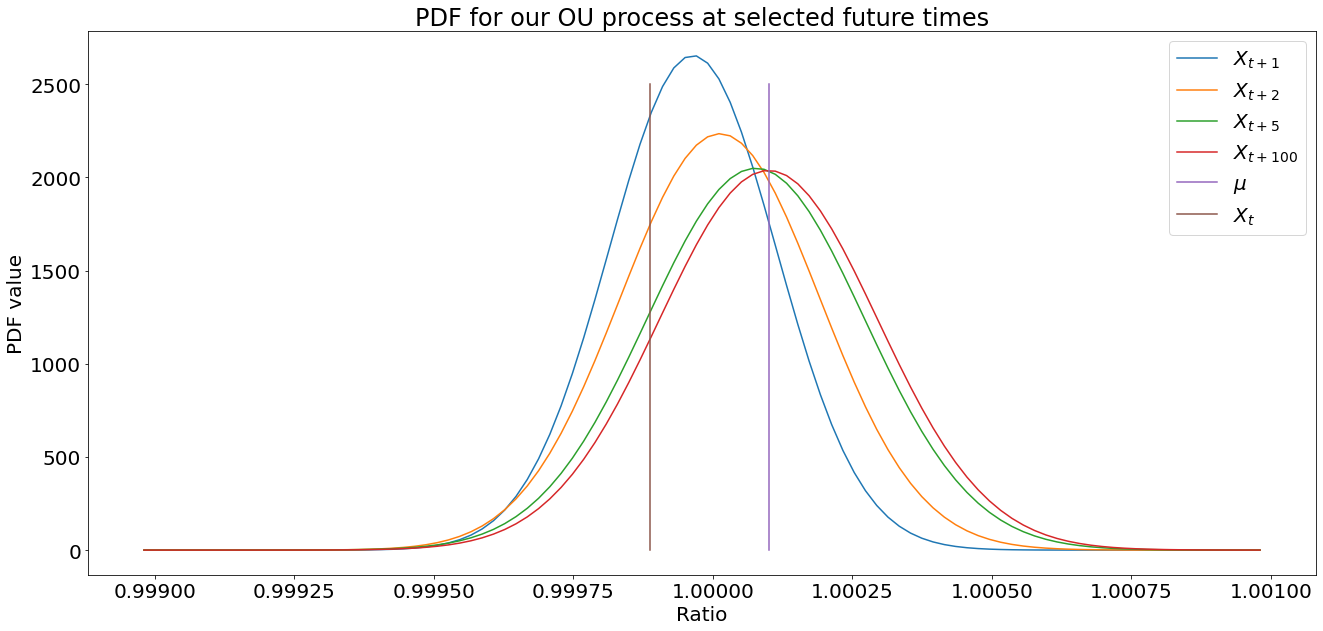

In [14]:
mu, last = 1.0001, Y[10]
domain = np.linspace(y2.mean()-1e-3, y2.mean()+1e-3, 100)
image_1 = OUFP(domain, last, 1, mu, theta2, sigma2)
image_2 = OUFP(domain, last, 2, mu, theta2, sigma2)
image_5 = OUFP(domain, last, 5, mu, theta2, sigma2)
image_100 = OUFP(domain, last, 100, mu, theta2, sigma2)

plt.plot(domain, image_1, label=r"$X_{t+1}$")
plt.plot(domain, image_2, label=r"$X_{t+2}$")
plt.plot(domain, image_5, label=r"$X_{t+5}$")
plt.plot(domain, image_100, label=r"$X_{t+100}$")
plt.plot(mu - 0*domain, np.linspace(0, 2500, len(domain)), label=r"$\mu$")
plt.plot(last - 0*domain, np.linspace(0, 2500, len(domain)), label=r"$X_t$")
plt.title("PDF for our OU process at selected future times")
plt.ylabel("PDF value")
plt.xlabel("Ratio")
plt.legend()
plt.show()

## Example 2: should I trade now or wait?

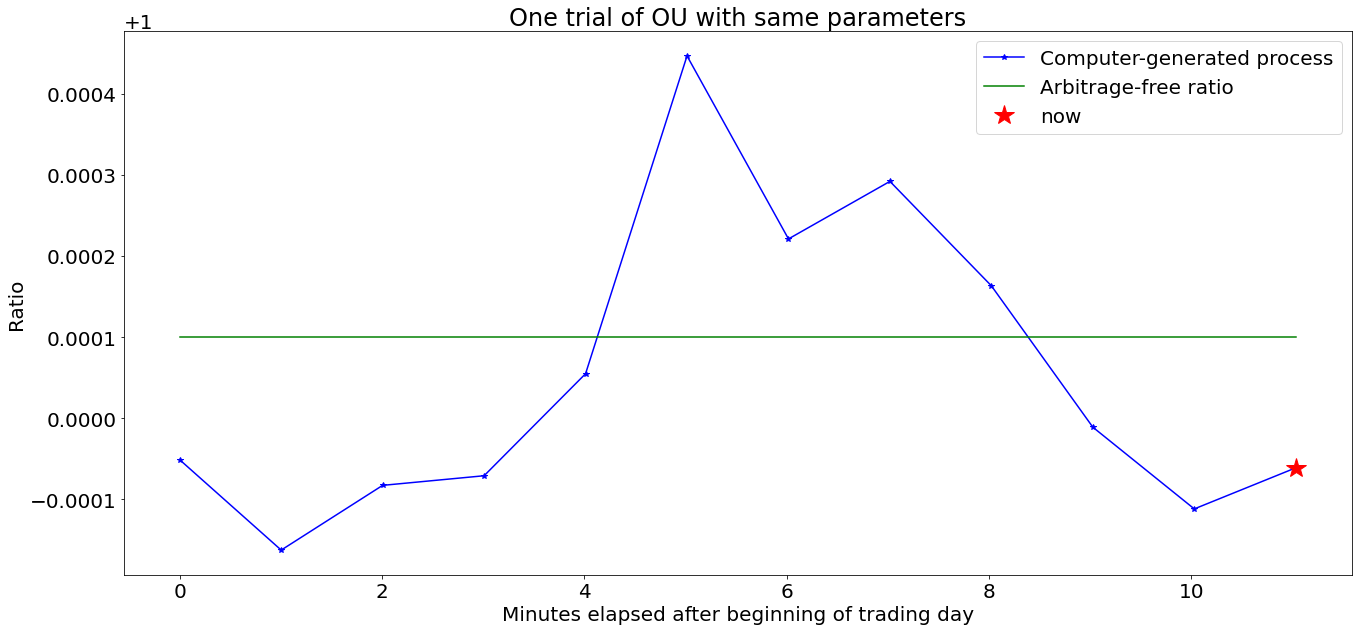

In [15]:
plt.title("One trial of OU with same parameters")
plt.plot(x2[:12], Y[:12], "*b-", label="Computer-generated process")
plt.plot(x2[:12], 1.0001 - 0 * x2[:12], "g", label="Arbitrage-free ratio")
plt.plot(x2[11:12], Y[11:12], "*r", markersize=20, label="now")
plt.xlabel("Minutes elapsed after beginning of trading day")
plt.ylabel("Ratio")
plt.legend()
plt.show()

Probability of inefficiency increasing further at t + 1: 35.01%
Probability of inefficiency increasing further at t + 2: 29.74%
Probability of inefficiency increasing further at t + 5: 23.01%
Probability of inefficiency increasing further at t + 100: 20.52%


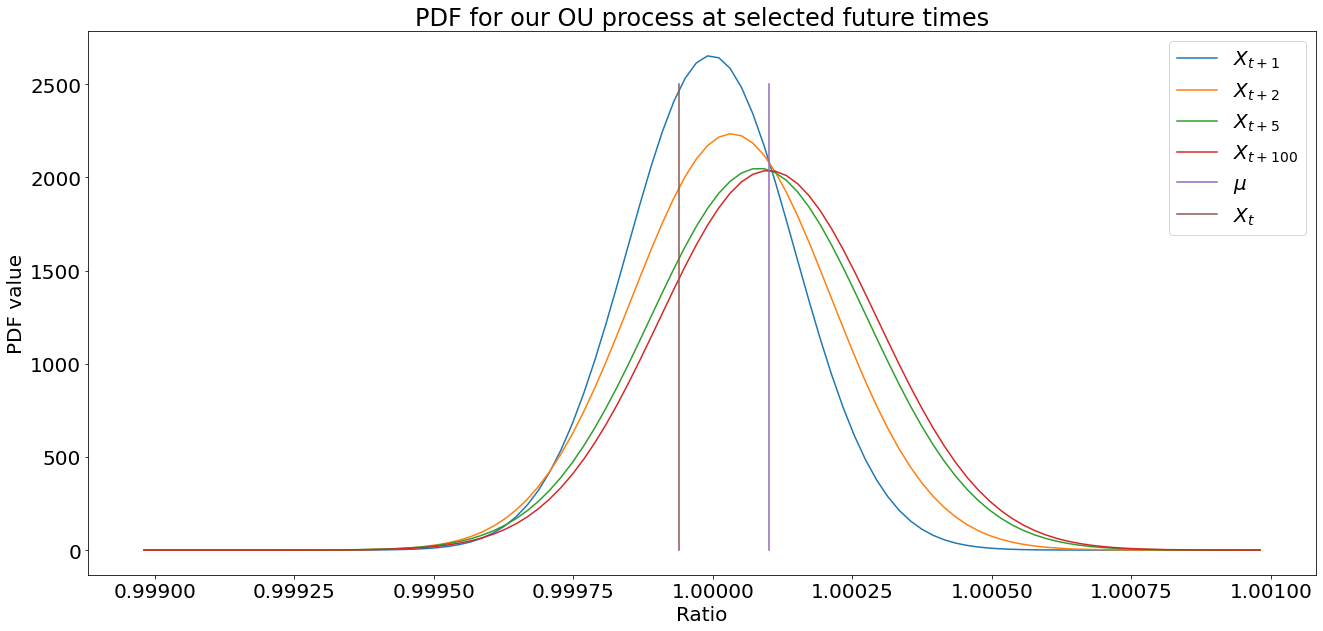

In [16]:
mu, last = 1.0001, Y[11]
domain = np.linspace(y2.mean()-1e-3, y2.mean()+1e-3, 100)
image_1 = OUFP(domain, last, 1, mu, theta2, sigma2)
image_2 = OUFP(domain, last, 2, mu, theta2, sigma2)
image_5 = OUFP(domain, last, 5, mu, theta2, sigma2)
image_100 = OUFP(domain, last, 100, mu, theta2, sigma2)

plt.plot(domain, image_1, label=r"$X_{t+1}$")
plt.plot(domain, image_2, label=r"$X_{t+2}$")
plt.plot(domain, image_5, label=r"$X_{t+5}$")
plt.plot(domain, image_100, label=r"$X_{t+100}$")
plt.plot(mu - 0*domain, np.linspace(0, 2500, len(domain)), label=r"$\mu$")
plt.plot(last - 0*domain, np.linspace(0, 2500, len(domain)), label=r"$X_t$")
plt.title("PDF for our OU process at selected future times")
plt.ylabel("PDF value")
plt.xlabel("Ratio")
plt.legend()
plt.show()